In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('day.csv')
print(df.head())
print(df.describe())
print(df.isnull().sum())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
          instant      sea

In [18]:
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df_clean = df[(z_scores < 3).all(axis=1)]
print(f"{df.shape[0] - df_clean.shape[0]}")

31


In [35]:
X = df_clean.drop(['dteday', 'cnt'], axis=1)
y = df_clean['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
cv_scores = cross_val_score(rf_model, X, y, cv=10)
print(f"cross-validation: {cv_scores.mean():.5f} (+/- {cv_scores.std() * 2:.5f})")

cross-validation: 0.97368 (+/- 0.03410)


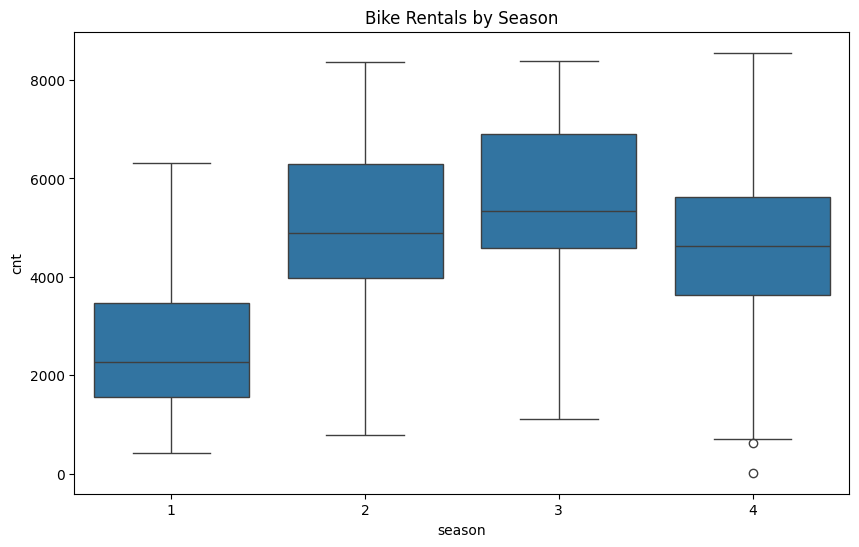

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='season', y='cnt')
plt.title('Bike Rentals by Season')
plt.show()